In [1]:
import numpy as np
import matplotlib.pyplot as plt
from reliability.Distributions import Weibull_Distribution

In [2]:
# 1. Definirea parametrilor de fiabilitate (Ex: Injectoare)
# Alpha (viata caracteristica) = 100.000 km, Beta (factor uzura) = 2.8
dist = Weibull_Distribution(alpha=100000, beta=2.8)

In [3]:
# 2. Definirea costurilor
Cp = 500   # Cost preventiv (înlocuire planificată)
Cr = 2500  # Cost reactiv (defectare în cursă + remorcare)

In [4]:
# 3. Calculul costului mediu per unitate de timp (kilometru)
# Formula: C(t) = [Cp * R(t) + Cr * (1 - R(t))] / [Integrala din R(t)]
# Pentru simplificare, folosim o aproximare practică a costului per km:
km_axa = np.linspace(1000, 150000, 500)
costuri_totale = []

for t in km_axa:
    prob_defectare = 1 - np.exp(-(t / dist.alpha)**dist.beta)
    # Costul așteptat per ciclu împărțit la timpul așteptat al ciclului
    cost_mediu = (Cp * (1 - prob_defectare) + Cr * prob_defectare) / t
    costuri_totale.append(cost_mediu)

In [5]:
# 4. Găsirea punctului minim
idx_minim = np.argmin(costuri_totale)
km_optim = km_axa[idx_minim]

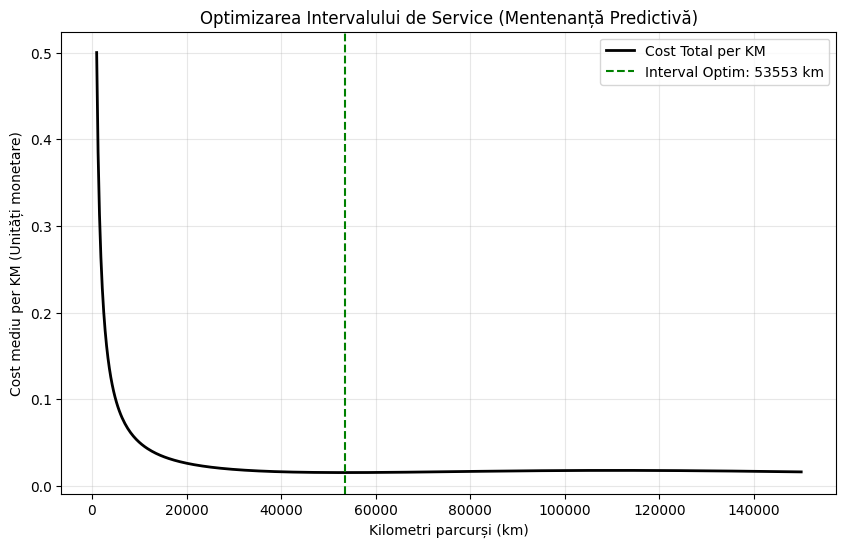

Strategie: Înlocuiți piesa la fiecare 53553 km pentru a minimiza pierderile.


In [6]:
# 5. Vizualizare


plt.figure(figsize=(10, 6))
plt.plot(km_axa, costuri_totale, label='Cost Total per KM', color='black', lw=2)
plt.axvline(x=km_optim, color='green', linestyle='--', label=f'Interval Optim: {km_optim:.0f} km')

plt.title('Optimizarea Intervalului de Service (Mentenanță Predictivă)')
plt.xlabel('Kilometri parcurși (km)')
plt.ylabel('Cost mediu per KM (Unități monetare)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"Strategie: Înlocuiți piesa la fiecare {km_optim:.0f} km pentru a minimiza pierderile.")

# Scopul este să găsești un echilibru între costul unei reparații planificate și costul mult mai mare al unei defectări neașteptate (care implică remorcare, timp de nefuncționare și reparații de urgență).
Punctul de echilibru: Nu este rentabil să schimbi piesa prea devreme (irosim resursă), dar nici prea târziu (costurile de eșec sunt prea mari).
Decizie bazată pe date: Dacă piesa ar avea un $\beta$ (Beta) sub $1.0$ (defecte aleatorii), acest grafic nu ar avea un punct minim — mentenanța preventivă ar fi inutilă, fiind mai ieftin să "repari când se strică".
Predictibilitate: Cu cât $\beta$ este mai mare, cu atât intervalul optim de service devine mai clar definit.
## Analiza Cost-Beneficiu pentru Mentenanță Predictivă
Am utilizat un model de optimizare a costurilor bazat pe distribuția Weibull. 
Obiectivul este minimizarea funcției de cost:
$$C(t) = \frac{C_p \cdot R(t) + C_r \cdot F(t)}{\int_{0}^{t} R(x) dx}$$
unde:
* $C_p$: Cost preventiv
* $C_r$: Cost reactiv
* $R(t)$: Fiabilitatea (Survival Function)